# Demo to replicate the one-shot learning behaviour demonstrated by rats (Tse et al. 2007) using a fully neural biologically plausible RL agent

Code: M Ganesh Kumar

Last updated: 16 September 2023

Paper: One-shot learning of paired association navigation with biologically plausible schemas

Link: https://arxiv.org/abs/2106.03580

Email: m_ganeshkumar@u.nus.edu 

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
sys.path.append("C:/Users/Razer/PycharmProjects/schema4one/examples/")
from demo_utils import run_hebagent_multiplepa_expt, get_default_hp, Maze, ResACAgent, saveload
import pandas as pd

## Initialize hyperparameters

In [2]:
hp = get_default_hp(task='6pa')

hp['time'] = 600  # set max time for each trial
hp['probetime'] = 60  # set max time for each probe trial

hp['alr'] = 0.00005  # acor learning rate
hp['clr'] = 0.0002  # critic learning rate
hp['taug'] = 3000  # time constant for RPE
hp['usenmc'] = True  # True to use Neural Motor Controller
hp['stochlearn'] = True  # True to learn association in one-shot using node perturbation method
hp['Rval'] = 5  # reward value
hp['render'] = False  # visualise movement trial by trial
hp['contbeta'] = 0.8  # Beta control parameter where Actor and Schema determines direction of movement

hp['exptname'] = '6pa_res_{}cb_{}ach_{}glr_{}sl_{}clr_{}tg_{}alr_{}R_{}dt_{}'.format(
    hp['contbeta'],hp['ach'], hp['glr'], hp['stochlearn'], hp['clr'], hp['taug'],hp['alr'],
    hp['Rval'], hp['tstep'], time.monotonic())
print(hp['exptname'])


6pa_res_0.8cb_5e-05ach_7.5e-06glr_Truesl_0.0002clr_3000tg_5e-05alr_5R_20dt_181364.437


## Initialize Environments
- OPA: 20 session - 17 training, 3 probes
- 2NPA, 6NPA or NM 2 sessions: 1 training, 1 probe

In [3]:
env = Maze(hp)
trainprobesess = [2,9,16]
oneshotprobesess = [2]
envtypes = ['train','opa','2npa','6npa','nm','6nm']
probenames = ['PS1','PS2','PS3']
evalprobenames = ['OPA','2NPA','6NPA','NM']
nmprobenames = ['NM1','NM2','NM3', '6NPANM']

## Initialize neural agent with neural motor controller

In [4]:
agent = ResACAgent(hp=hp)

## Train Neural agent on OPA for 20 sessions

In [5]:
mpalatency, mpapath, mpaweights, mpavisitratio, mpalearned = run_hebagent_multiplepa_expt(mtype='train', env=env, agent=agent, sessions=20, noreward=trainprobesess, useweight=None)
saveload('save',[mpaweights],"mpaweights")

train env created. Training ...
C4 | S 90 | Dgr 0 | Recall Goal [-0.02 -0.14  0.98]
C5 | S 132 | Dgr 0 | Recall Goal [-0.04 -0.01  1.11]
C1 | S 53 | Dgr 0 | Recall Goal [-0.07 -0.03  1.02]
C3 | S 34 | Dgr 0 | Recall Goal [-0.05 -0.1   1.07]
C2 | S 131 | Dgr 0 | Recall Goal [0.06 0.01 1.09]
C6 | S 120 | Dgr 0 | Recall Goal [ 0.01 -0.26  1.02]
############## train Session 1/20, Avg Steps 4705.8, ##############
C5 | S 60 | Dgr 10.5 | Recall Goal [-0.07 -0.06  0.82]
C2 | S 60 | Dgr 5.44 | Recall Goal [ 0.07 -0.1   0.74]
C6 | S 60 | Dgr 0 | Recall Goal [-0.07 -0.19  0.78]
C1 | S 60 | Dgr 7.08 | Recall Goal [ 0.02 -0.1   0.94]
C3 | S 60 | Dgr 21.8 | Recall Goal [ 0.   -0.15  0.83]
C4 | S 60 | Dgr 11.5 | Recall Goal [-0.08 -0.08  0.81]
############## train Session 2/20, Avg Steps   nan, ##############
C5 | S 44 | Dgr 0 | Recall Goal [-0.3   0.18  0.83]
C1 | S 131 | Dgr 0 | Recall Goal [-0.14  0.6   0.99]
C2 | S 215 | Dgr 0 | Recall Goal [0.49 0.13 0.92]
C6 | S 151 | Dgr 0 | Recall Goal [ 0.44

C:\Users\Razer\miniconda3\envs\s4o\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


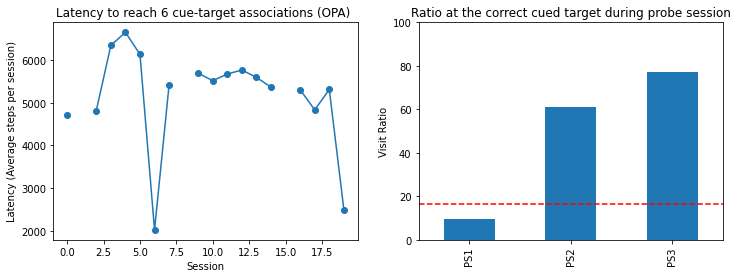

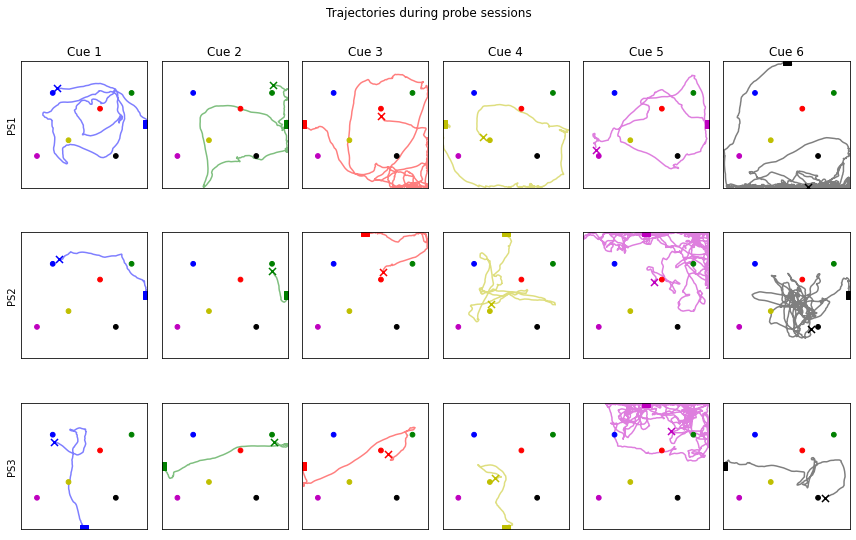

In [38]:
# Plot learning performance
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(mpalatency, marker='o')
plt.ylabel('Latency (Average steps per session)')
plt.xlabel('Session')
plt.title('Latency to reach 6 cue-target associations (OPA) ')

ax = plt.subplot(122)
df = pd.DataFrame(mpavisitratio, index=probenames)
df.plot(kind='bar',legend=False,ax=ax)
ax.axhline(y=100/6,color='red',linestyle='--')  # chance performance 1 of 6 correct targets
ax.set_ylim(0,100)
ax.set_ylabel('Visit Ratio')
ax.set_title('Ratio at the correct cued target during probe session')

col = ['b', 'g', 'r', 'y', 'm', 'k']
env.make('train')
f,axs = plt.subplots(nrows=3, ncols=6, figsize=(12,8))
f.suptitle('Trajectories during probe sessions')
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

for p in range(3):
    for c in range(6):
        K = mpapath[p,c]
        ax = axs[p,c]
        if p == 0:
            ax.set_title(f"Cue {c+1}")
        if c == 0:
            ax.set_ylabel(probenames[p])

        ax.axis((-env.au / 2, env.au / 2, -env.au / 2, env.au / 2))
        ax.set_aspect('equal', adjustable='box')

        for r in range(6):
            circle = plt.Circle(env.rlocs[r], env.rrad, color=col[r], zorder=3)
            ax.add_artist(circle)

        targetloc = env.rlocs[c]
        dist = np.linalg.norm(targetloc-K,ord=2,axis=1)
        if (dist < 0.1).any():
            idx = np.argmax(dist<0.1)
        else:
            idx = -1

        ax.plot(K[:idx, 0], K[:idx, 1], col[c], alpha=0.5, zorder=1)
        ax.scatter(K[0,0],K[0,1],color=col[c],zorder=2, marker='s',s=50)  # square plots start
        ax.scatter(K[idx,0],K[idx,1],color=col[c],zorder=2, marker='x',s=50)  # cross plots end
        
plt.tight_layout()
plt.show()

## Use trained agent to learn new PAs in one-shot

In [7]:
# Train Neural agent on OPA for 1 session as control and probe after, use weights learned over 20 sessions on MPA
opalatency, opapath, opaweights, opavisitratio, opalearned = run_hebagent_multiplepa_expt(mtype='opa', env=env, agent=agent, sessions=2, noreward=oneshotprobesess, useweight=mpaweights)
saveload('save',[opaweights],"opaweights")

opa env created. Training ...
C6 | S 18 | Dgr 0 | Recall Goal [ 0.44 -1.03  1.09]
C1 | S 7 | Dgr 0 | Recall Goal [-0.96  0.14  1.04]
C4 | S 6 | Dgr 0 | Recall Goal [-0.57 -0.9   1.07]
C2 | S 11 | Dgr 0 | Recall Goal [0.89 0.33 0.96]
C5 | S 600 | Dgr 0 | Recall Goal [-0.18 -0.26  0.06]
C3 | S 17 | Dgr 0 | Recall Goal [0.3  0.16 1.05]
############## opa Session 1/2, Avg Steps 5523.3, ##############
C6 | S 60 | Dgr 100 | Recall Goal [ 0.32 -0.9   0.99]
C4 | S 60 | Dgr 60.9 | Recall Goal [-0.61 -0.78  1.05]
C5 | S 60 | Dgr 16.3 | Recall Goal [-0.25 -0.06  0.31]
C1 | S 60 | Dgr 100 | Recall Goal [-0.67  0.01  0.98]
C3 | S 60 | Dgr 94.6 | Recall Goal [0.24 0.16 0.83]
C2 | S 60 | Dgr 90.4 | Recall Goal [0.66 0.21 0.88]
############## opa Session 2/2, Avg Steps   nan, ##############
Agent opa training dig rate: [77.02687588]


In [27]:
# Train Neural agent on 2NPA for 1 session and probe after, use weights learned over 20 sessions on MPA
npa2latency, npa2path, npa2weights, npa2visitratio, npa2learned = run_hebagent_multiplepa_expt(mtype='2npa', env=env, agent=agent, sessions=2, noreward=oneshotprobesess, useweight=mpaweights)
saveload('save',[npa2weights],"npa2weights")

2npa env created. Training ...
C4 | S 600 | Dgr 0 | Recall Goal [-0.21 -0.3   0.61]
C5 | S 575 | Dgr 0 | Recall Goal [-0.35 -0.82  0.93]
C2 | S 190 | Dgr 0 | Recall Goal [-0.03 -0.45  1.03]
C3 | S 90 | Dgr 0 | Recall Goal [0.2  0.24 0.9 ]
C8 | S 61 | Dgr 0 | Recall Goal [-0.41 -0.33  1.12]
C7 | S 9 | Dgr 0 | Recall Goal [-0.11  0.14  0.93]
############## 2npa Session 1/2, Avg Steps 12730.5, ##############
C4 | S 60 | Dgr 0 | Recall Goal [-0.21 -0.35  0.7 ]
C2 | S 60 | Dgr 61.7 | Recall Goal [ 0.12 -0.17  0.96]
C7 | S 60 | Dgr 100 | Recall Goal [-0.02  0.05  0.88]
C8 | S 60 | Dgr 0 | Recall Goal [-0.26 -0.31  0.76]
C5 | S 60 | Dgr 0 | Recall Goal [-0.29 -0.56  0.86]
C3 | S 60 | Dgr 0.799 | Recall Goal [0.1  0.25 1.05]
############## 2npa Session 2/2, Avg Steps   nan, ##############
Agent 2npa training dig rate: [49.99999889]


NameError: name 'saveload' is not defined

In [9]:
# Train Neural agent on 6NPA for 1 session and probe after, use weights learned over 20 sessions on MPA
npa6latency, npa6path, npa6weights, npa6visitratio, npa6learned = run_hebagent_multiplepa_expt(mtype='6npa', env=env, agent=agent, sessions=2, noreward=oneshotprobesess, useweight=mpaweights)
saveload('save',[npa6weights],"npa6weights")

6npa env created. Training ...
C13 | S 25 | Dgr 0 | Recall Goal [-0.3  -0.53  0.98]
C16 | S 152 | Dgr 0 | Recall Goal [-0.03 -1.36  0.95]
C12 | S 18 | Dgr 0 | Recall Goal [ 0.45 -0.06  1.1 ]
C14 | S 600 | Dgr 0 | Recall Goal [-0.08 -0.19  0.34]
C11 | S 306 | Dgr 0 | Recall Goal [-0.5   0.61  0.87]
C15 | S 88 | Dgr 0 | Recall Goal [ 0.18 -0.73  1.  ]
############## 6npa Session 1/2, Avg Steps 9932.7, ##############
C13 | S 60 | Dgr 77.9 | Recall Goal [-0.38 -0.54  1.05]
C16 | S 60 | Dgr 98.5 | Recall Goal [-0.08 -1.3   0.96]
C14 | S 60 | Dgr 0 | Recall Goal [ 0.12 -0.05  0.47]
C12 | S 60 | Dgr 92.1 | Recall Goal [ 0.39 -0.06  1.17]
C15 | S 60 | Dgr 83.1 | Recall Goal [ 0.21 -0.66  1.01]
C11 | S 60 | Dgr 94.6 | Recall Goal [-0.44  0.33  0.96]
############## 6npa Session 2/2, Avg Steps   nan, ##############
Agent 6npa training dig rate: [74.39001015]


In [10]:
# Train Neural agent on NM for 1 session and probe after, use weights learned over 20 sessions on MPA
nmlatency, nmpath, nmweights, nmvisitratio, nmlearned = run_hebagent_multiplepa_expt(mtype='nm', env=env, agent=agent, sessions=2, noreward=oneshotprobesess, useweight=mpaweights)
saveload('save',[nmweights],"nmweights")

nm env created. Training ...
C11 | S 19 | Dgr 0 | Recall Goal [-0.45 -0.08  1.01]
C16 | S 218 | Dgr 0 | Recall Goal [0.49 0.33 0.93]
C12 | S 63 | Dgr 0 | Recall Goal [-0.35 -0.54  0.94]
C13 | S 351 | Dgr 0 | Recall Goal [-0.18 -0.29  0.93]
C14 | S 297 | Dgr 0 | Recall Goal [-0.47 -0.13  1.04]
C15 | S 200 | Dgr 0 | Recall Goal [-0.09 -0.28  0.94]
############## nm Session 1/2, Avg Steps 9593.5, ##############
C11 | S 60 | Dgr 0 | Recall Goal [-0.09 -0.09  0.59]
C16 | S 60 | Dgr 0 | Recall Goal [ 0.02 -0.19  0.87]
C15 | S 60 | Dgr 15.7 | Recall Goal [-0.09 -0.28  0.85]
C12 | S 60 | Dgr 36.7 | Recall Goal [-0.22 -0.3   0.85]
C14 | S 60 | Dgr 2.42 | Recall Goal [-0.35 -0.01  0.67]
C13 | S 60 | Dgr 3.11 | Recall Goal [-0.11 -0.16  0.55]
############## nm Session 2/2, Avg Steps   nan, ##############
Agent nm training dig rate: [9.66648267]


[77.02687588 49.99999889 74.39001015  9.66648267]


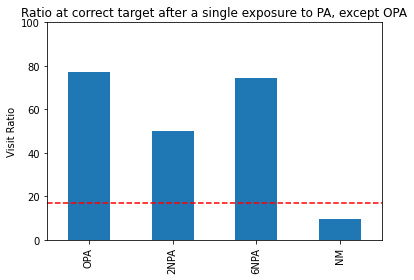

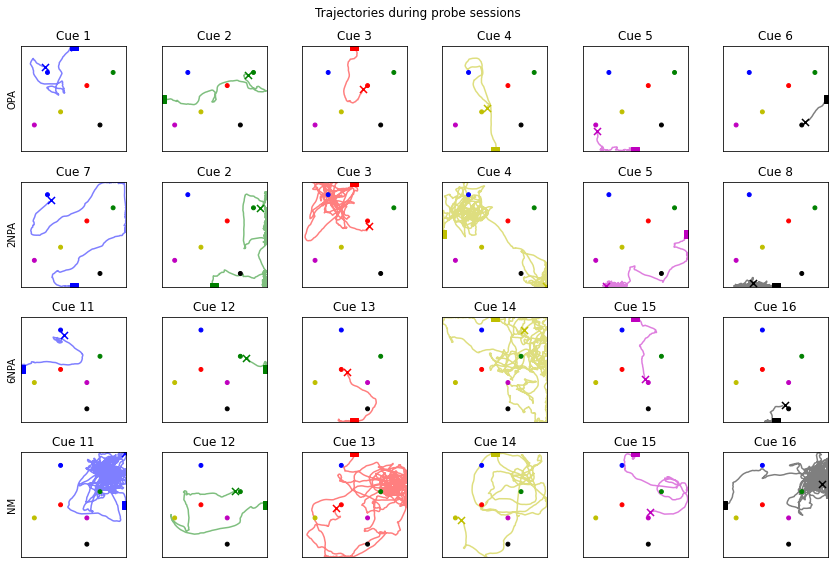

In [37]:
# plot performance
evaldigrate = np.concatenate([opavisitratio, npa2visitratio, npa6visitratio, nmvisitratio])
print(evaldigrate)
df2 = pd.DataFrame(evaldigrate, index=evalprobenames)
ax = df2.plot(kind='bar',legend=False)
ax.axhline(y=100/6,color='red',linestyle='--')  # chance performance 1 of 6 correct targets
ax.set_ylim(0,100)
ax.set_ylabel('Visit Ratio')
ax.set_title('Ratio at correct target after a single exposure to PA, except OPA')


col = ['b', 'g', 'r', 'y', 'm', 'k']
allevalpaths = [opapath, npa2path, npa6path, nmpath]
npa2cues = [7, 2,3,4,5,8]
f,axs = plt.subplots(nrows=4, ncols=6, figsize=(12,8))
f.suptitle('Trajectories during probe sessions')
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

for p in range(4):
    env.make(envtypes[p+1])
    for c in range(6):
        path = allevalpaths[p]
        K = path[0, c]
        ax = axs[p,c]
        if p == 0:
            ax.set_title(f"Cue {c+1}")
        elif p == 1:
            ax.set_title(f"Cue {npa2cues[c]}")
        else:
            ax.set_title(f"Cue {c+11}")

        if c == 0:
            ax.set_ylabel(evalprobenames[p])

        ax.axis((-env.au / 2, env.au / 2, -env.au / 2, env.au / 2))
        ax.set_aspect('equal', adjustable='box')

        for r in range(6):
            circle = plt.Circle(env.rlocs[r], env.rrad, color=col[r], zorder=3)
            ax.add_artist(circle)

        targetloc = env.rlocs[c]
        dist = np.linalg.norm(targetloc-K,ord=2,axis=1)
        if (dist < 0.1).any():
            idx = np.argmax(dist<0.1)
        else:
            idx = -1

        ax.plot(K[:idx, 0], K[:idx, 1], col[c], alpha=0.5, zorder=1)
        ax.scatter(K[0,0],K[0,1],color=col[c],zorder=2, marker='s',s=50)  # square plots start
        ax.scatter(K[idx,0],K[idx,1],color=col[c],zorder=2, marker='x',s=50)  # cross plots end
        
plt.tight_layout()
plt.show()



## Introduce trained agents to a New Maze (shuffle place cells) for 20 sessions followed by 2 sessions with 6 new PAs

In [12]:
# Train Neural agent on NM for 20 session similar to on MPA, use weights learned over 20 sessions on MPA
nm20latency, nm20path, nm20weights, nm20visitratio, nm20learned = run_hebagent_multiplepa_expt(mtype='nm', env=env, agent=agent, sessions=20, noreward=trainprobesess, useweight=mpaweights)
saveload('save',[nm20weights],"nm20weights")

nm env created. Training ...
C11 | S 50 | Dgr 0 | Recall Goal [0.51 0.08 0.97]
C13 | S 495 | Dgr 0 | Recall Goal [-0.13 -0.49  1.12]
C12 | S 128 | Dgr 0 | Recall Goal [-0.22 -0.08  0.93]
C16 | S 239 | Dgr 0 | Recall Goal [-0.03 -0.21  0.92]
C14 | S 109 | Dgr 0 | Recall Goal [-0.05 -0.74  1.07]
C15 | S 487 | Dgr 0 | Recall Goal [-0.53  0.09  1.07]
############## nm Session 1/20, Avg Steps 12586.7, ##############
C12 | S 60 | Dgr 0 | Recall Goal [-0.23 -0.09  0.8 ]
C14 | S 60 | Dgr 0 | Recall Goal [-0.19 -0.34  0.78]
C11 | S 60 | Dgr 0 | Recall Goal [-0.   -0.03  0.81]
C15 | S 60 | Dgr 52.5 | Recall Goal [-0.2  -0.02  0.64]
C13 | S 60 | Dgr 0 | Recall Goal [-0.16 -0.24  0.83]
C16 | S 60 | Dgr 80.1 | Recall Goal [-0.09 -0.17  0.93]
############## nm Session 2/20, Avg Steps   nan, ##############
C14 | S 600 | Dgr 0 | Recall Goal [-0.07 -0.25  0.49]
C13 | S 600 | Dgr 0 | Recall Goal [-0.08 -0.11  0.46]
C16 | S 44 | Dgr 0 | Recall Goal [-0.67 -0.16  0.97]
C12 | S 600 | Dgr 0 | Recall Goal [-

In [13]:
# Train Neural agent on 6NM for 2 session, use weights learned over 20 sessions on NM
nm6latency, nm6path, nm6weights, nm6visitratio, nm6learned = run_hebagent_multiplepa_expt(mtype='6nm', env=env, agent=agent, sessions=2, noreward=oneshotprobesess, useweight=nm20weights)
saveload('save',[nm6weights],"nm6weights")

6nm env created. Training ...
C18 | S 231 | Dgr 0 | Recall Goal [ 0.96 -0.7   0.9 ]
C17 | S 36 | Dgr 0 | Recall Goal [ 0.58 -0.81  1.12]
C10 | S 31 | Dgr 0 | Recall Goal [ 0.1  -0.18  0.93]
C7 | S 600 | Dgr 0 | Recall Goal [ 0.13 -0.1   0.53]
C8 | S 600 | Dgr 0 | Recall Goal [ 0.07 -0.08  0.46]
C9 | S 313 | Dgr 0 | Recall Goal [1.06 0.85 1.07]
############## 6nm Session 1/2, Avg Steps 15101.3, ##############
C8 | S 60 | Dgr 0 | Recall Goal [ 0.25 -0.12  0.53]
C17 | S 60 | Dgr 77.6 | Recall Goal [ 0.68 -0.49  0.95]
C7 | S 60 | Dgr 0 | Recall Goal [0.13 0.01 0.35]
C18 | S 60 | Dgr 55.3 | Recall Goal [ 0.89 -0.38  1.04]
C10 | S 60 | Dgr 78.5 | Recall Goal [ 0.23 -0.11  0.84]
C9 | S 60 | Dgr 55 | Recall Goal [0.55 0.25 0.93]
############## 6nm Session 2/2, Avg Steps   nan, ##############
Agent 6nm training dig rate: [44.39336558]


C:\Users\Razer\miniconda3\envs\s4o\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


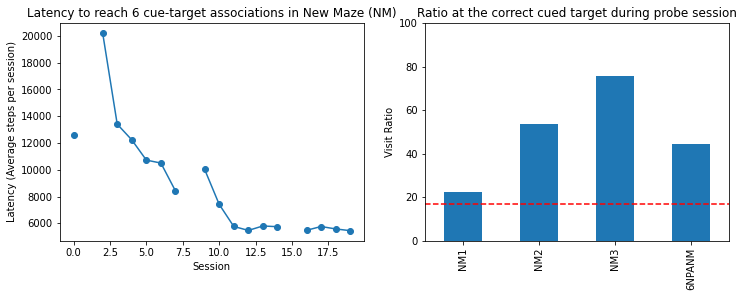

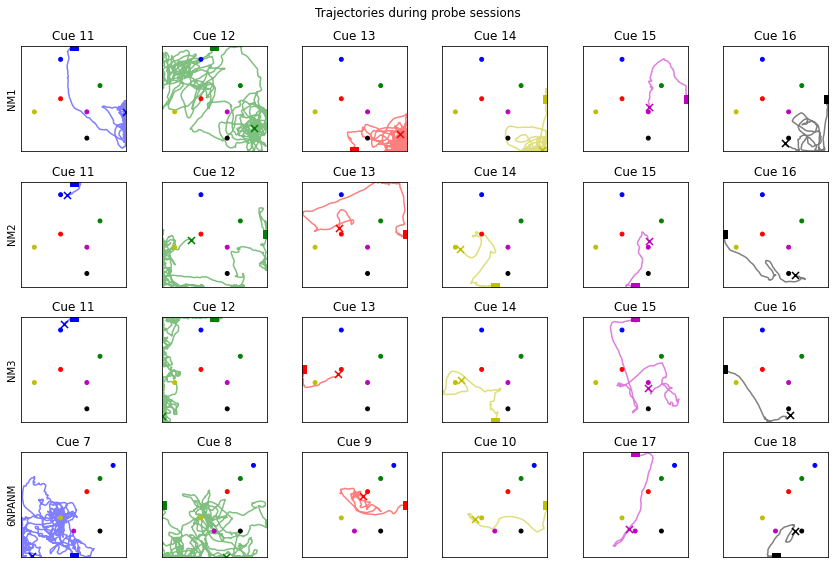

In [39]:
# plot relearning new environment and one shot performance
# plot performance

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(nm20latency, marker='o')
plt.ylabel('Latency (Average steps per session)')
plt.xlabel('Session')
plt.title('Latency to reach 6 cue-target associations in New Maze (NM)')

ax = plt.subplot(122)
nmvisitratios = np.concatenate([nm20visitratio, nm6visitratio])
df3 = pd.DataFrame(nmvisitratios, index=nmprobenames)
df3.plot(kind='bar',legend=False,ax=ax)
ax.axhline(y=100/6,color='red',linestyle='--')  # chance performance 1 of 6 correct targets
ax.set_ylim(0,100)
ax.set_ylabel('Visit Ratio')
ax.set_title('Ratio at the correct cued target during probe session')

col = ['b', 'g', 'r', 'y', 'm', 'k']
allnmpaths = [nm20path, nm6path]
nm6cues = [7,8,9,10,17,18]
f,axs = plt.subplots(nrows=4, ncols=6, figsize=(12,8))
f.suptitle('Trajectories during probe sessions')
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

for p in range(4):
    if p == 3:
        env.make('6nm')
    else:
        env.make('nm')

    for c in range(6):
        ax = axs[p,c]
        if p == 3:
            ax.set_title(f"Cue {nm6cues[c]}")
            path = allnmpaths[1]
            K = path[0, c]
        else:
            ax.set_title(f"Cue {c+11}")
            path = allnmpaths[0]
            K = path[p, c]

        if c == 0:
            ax.set_ylabel(nmprobenames[p])

        ax.axis((-env.au / 2, env.au / 2, -env.au / 2, env.au / 2))
        ax.set_aspect('equal', adjustable='box')

        for r in range(6):
            circle = plt.Circle(env.rlocs[r], env.rrad, color=col[r], zorder=3)
            ax.add_artist(circle)
            
        targetloc = env.rlocs[c]
        dist = np.linalg.norm(targetloc-K,ord=2,axis=1)
        if (dist < 0.1).any():
            idx = np.argmax(dist<0.1)
        else:
            idx = -1

        ax.plot(K[:idx, 0], K[:idx, 1], col[c], alpha=0.5, zorder=1)
        ax.scatter(K[0,0],K[0,1],color=col[c],zorder=2, marker='s',s=50)  # square plots start
        ax.scatter(K[idx,0],K[idx,1],color=col[c],zorder=2, marker='x',s=50)  # cross plots end
        
plt.tight_layout()
plt.show()